In [2]:
# pip install scikit-learn


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

<b><h1>1. Prepare Dataset </h1></b>

In [4]:
# Import Dataset
df=pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Bộ dữ liệu này chứa 45.000 bản ghi về người đăng ký vay vốn, với nhiều thuộc tính khác nhau liên quan đến thông tin nhân khẩu học cá nhân, tình hình tài chính và chi tiết khoản vay. Bộ dữ liệu này có thể được sử dụng cho mô hình hóa dự đoán, đặc biệt trong việc đánh giá rủi ro tín dụng và dự đoán khả năng vỡ nợ.

Nội dung bộ dữ liệu

Bộ dữ liệu bao gồm 14 cột đại diện cho các yếu tố khác nhau ảnh hưởng đến việc phê duyệt và vỡ nợ khoản vay:

<b>Thông tin cá nhân </b><br>
person_age: Tuổi của người đăng ký (tính bằng năm). <br>
person_gender: Giới tính của người đăng ký (nam, nữ). <br>
person_education: Trình độ học vấn (Trung học, Cử nhân, Thạc sĩ, v.v.). <br>
person_income: Thu nhập hàng năm của người đăng ký (bằng đô la Mỹ). <br>
person_emp_exp: Số năm kinh nghiệm làm việc. <br>
person_home_ownership: Loại hình sở hữu nhà (THUÊ, SỞ HỮU, TRẢ GÓP). <br>


<b>Chi tiết khoản vay </b> <br>
loan_amnt: Số tiền vay yêu cầu (bằng đô la Mỹ). <br>
loan_intent: Mục đích vay (CÁ NHÂN, GIÁO DỤC, Y TẾ, v.v.). <br>
loan_int_rate: Lãi suất cho khoản vay (tỷ lệ phần trăm). <br>
loan_percent_income: Tỷ lệ giữa số tiền vay và thu nhập. <br>


<b>Lịch sử tín dụng & vay </b> <br>
cb_person_cred_hist_length: Thời gian lịch sử tín dụng của người đăng ký (tính bằng năm). <br>
credit_score: Điểm tín dụng của người đăng ký. <br>
previous_loan_defaults_on_file: Người đăng ký đã từng có tiền sử vỡ nợ hay chưa (Có hoặc Không). <br>


<b> Biến mục tiêu  </b> <br>
loan_status: 1 nếu khoản vay được trả thành công, 0 nếu người đăng ký vỡ nợ. <br>

<b> EDA (Exploratory Data Analysis): phân tích khám phá dữ liệu trước khi xây dựng mô hình </b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Không có giá trị null

In [6]:
df.describe() #tạo ra thống kê mô tả (descriptive statistics) cho dữ liệu trong DataFrame


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
# Gọi tên biến Target
tar_column='loan_status'

Text(0.5, 1.0, 'Biểu đồ tròn')

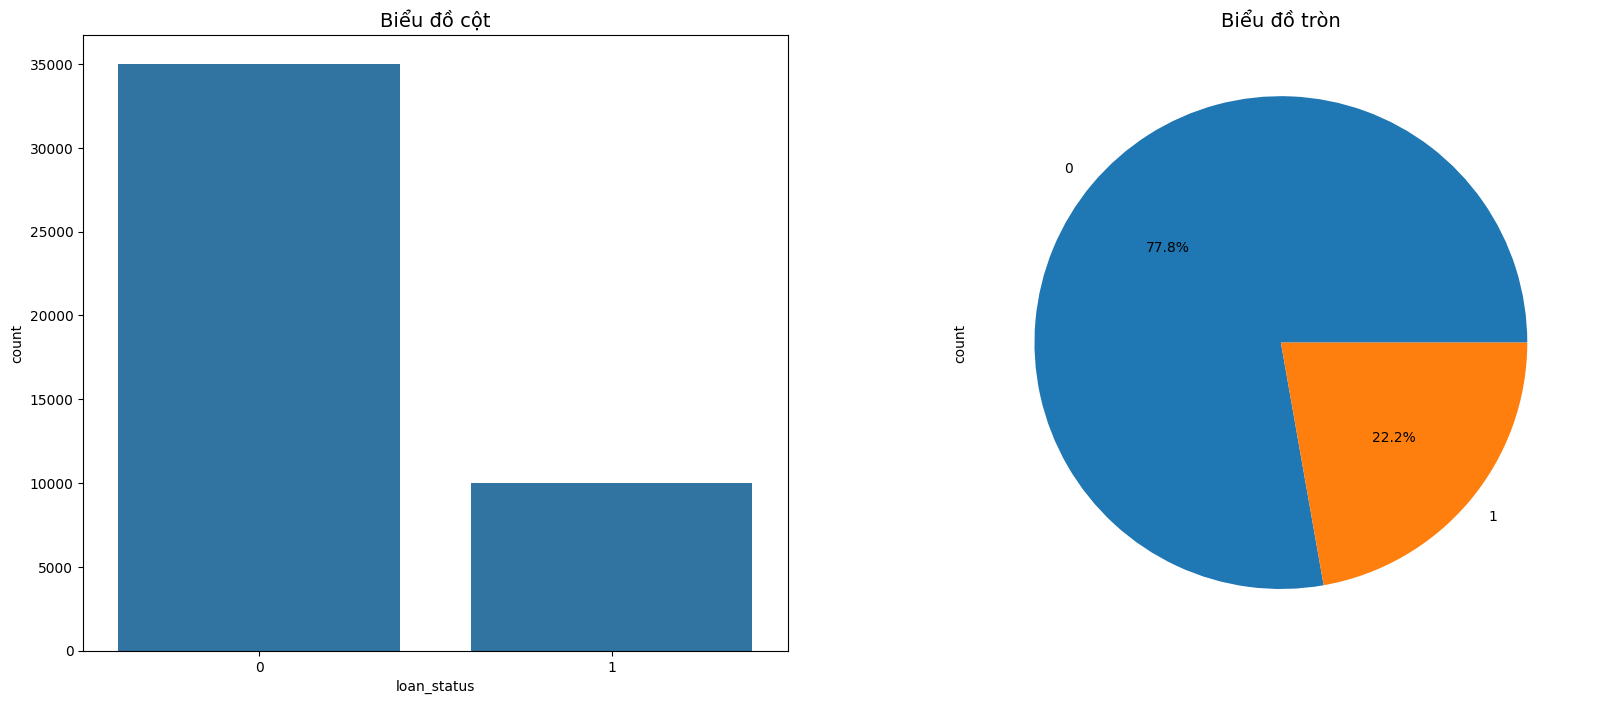

In [8]:
# Dùng biểu đồ tròn và cột để xem phân bố giá trị trong cột target
f, ax = plt.subplots(ncols= 2, figsize=(20,8))

sns.countplot(x=tar_column, data=df,ax=ax[0])
ax[0].set_title("Biểu đồ cột", fontsize=14)
df[tar_column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Biểu đồ tròn", fontsize=14)

<b> Explore Num cols & Cat cols(phân tích cột dữ liệu số và dữ liệu phân loại/ dạng nhãn) </b>

In [9]:
# Tạo List gọi tên tất cả các cột
All_cols=df.columns.tolist()[:-1] # Bỏ đi cột Tar

In [10]:
All_cols

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

In [11]:
# Lập biến list chứa các cột Numeric và Object
Num_col=df.select_dtypes('number').columns.tolist()[:-1] # Bỏ target column
Cat_col=df.select_dtypes('object').columns.tolist()

In [12]:
Num_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [13]:
Cat_col

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [14]:
# Xem mỗi cột cat_cols có bao nhiêu phần tử độc lập
for col in Cat_col:
  print(f'{col}: {df[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [15]:
df[Cat_col] #lọc DataFrame để chỉ lấy các cột phân loại

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


<b> Vizualize The Numeric Col </b>

In [16]:
#Vizuallize all feature vs each other
# pp = sns.pairplot(df[Num_col + [tar_column]],
#                  hue=tar_column,
#                  palette='deep',
#                  height=3,
#                  diag_kind='kde',
#                  diag_kws=dict(fill=True),
#                  plot_kws=dict(s=20))

# pp.set(xticklabels=[])
# plt.show()

<b>Check Outiler Value: kiểm tra các giá trị có điểm khác biệt lớn trong data set, dưới đây sử dụng phương pháp boxlot </b>

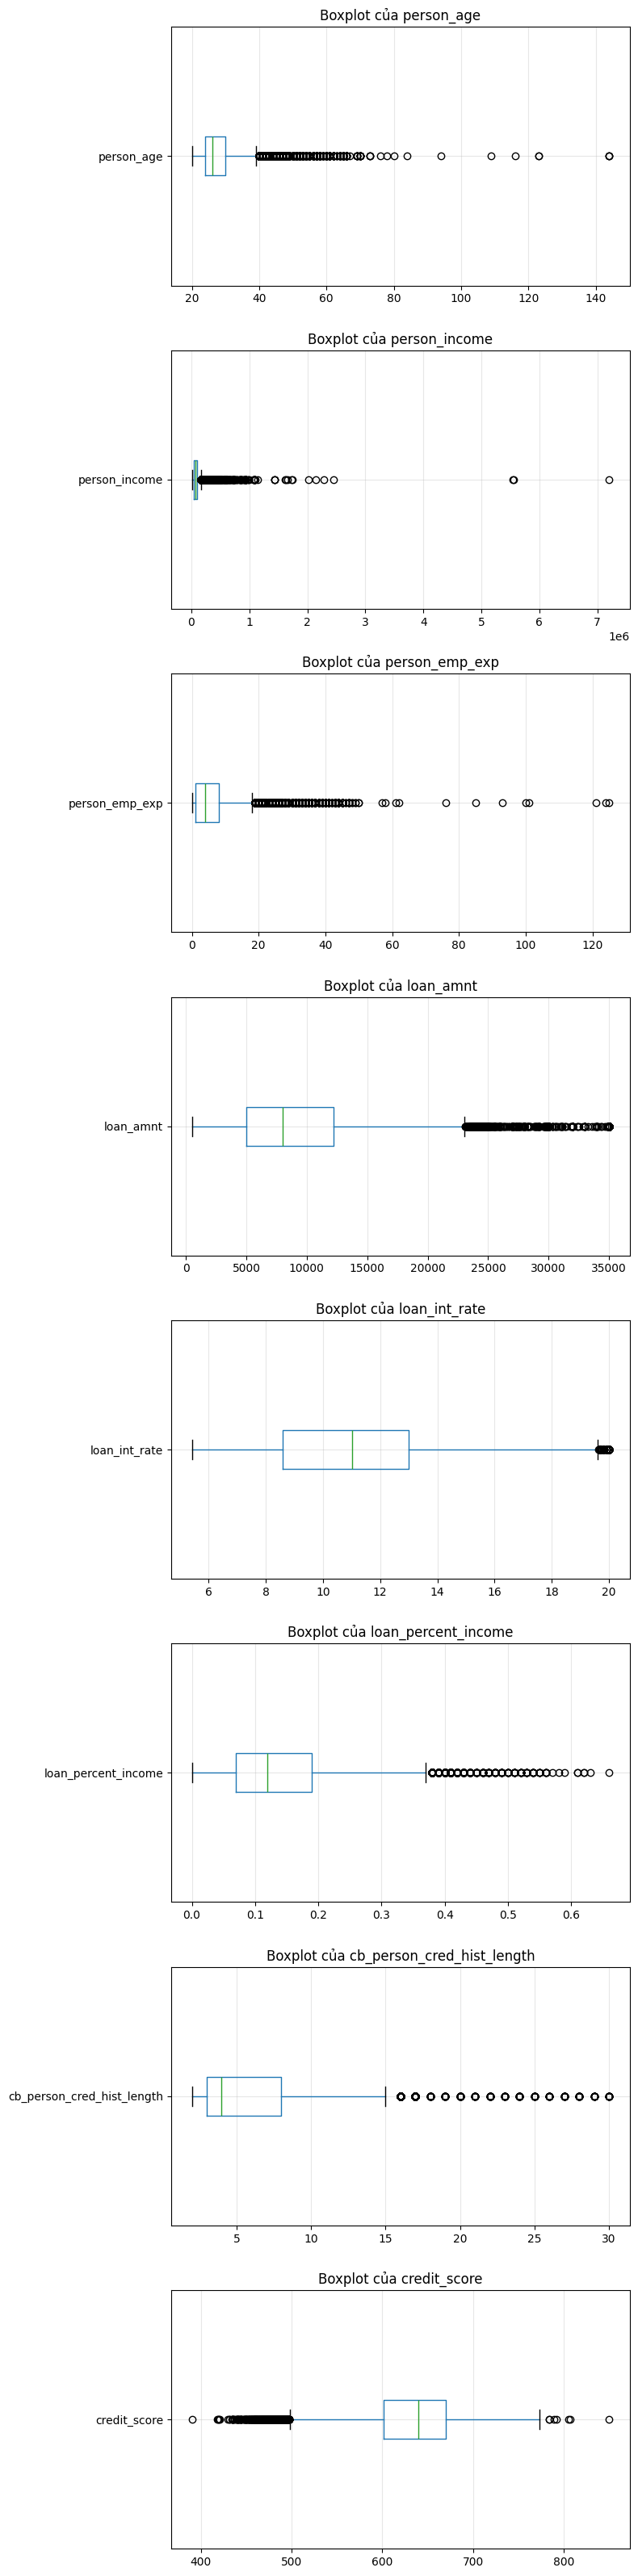

In [17]:
def plot_boxplots(df, numeric_columns):
    # Tạo figure với số subplot = số cột
    n = len(numeric_columns)
    fig, axes = plt.subplots(nrows=n, figsize=(8, 4*n))  # Kích thước tự điều chỉnh

    # Vẽ từng boxplot
    for i, col in enumerate(numeric_columns):
        df.boxplot(column=col, ax=axes[i], vert=False)  # vert=False để vẽ ngang
        axes[i].set_title(f"Boxplot của {col}", fontsize=12)
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()  # Tự động căn chỉnh khoảng cách
    plt.show()

# Gọi hàm
plot_boxplots(df, Num_col)

In [18]:
# Check skew đo lường mức độ bất đối xứng của phân phối dữ liệu 
# so với phân phối chuẩn (normal distribution).
from scipy.stats import skew
skewness = skew(df[Num_col])
skewness

array([ 2.54806907, 34.1364452 ,  2.59483087,  1.17969196,  0.21377695,
        1.03447767,  1.63166556, -0.61024049])

<b> Correlation Matrix For Num_col: xác định mối quan hệ giữa các biến số (numeric columns) trong dataset </b>

In [19]:
corr_matrix = df[Num_col + [tar_column]].corr()

<Axes: >

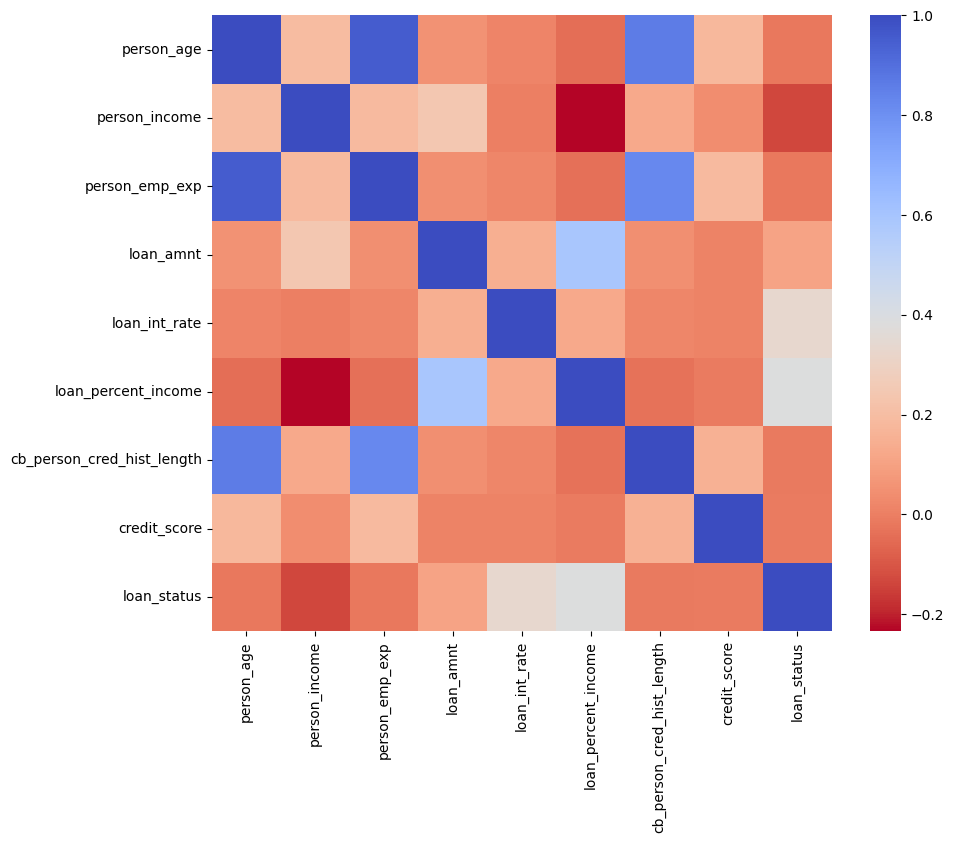

In [20]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))

sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [21]:
corr_matrix[tar_column].sort_values() 
#xem mức độ tương quan của tất cả các biến số (numeric features) 
#với một cột mục tiêu (tar_column)

person_income                -0.135808
person_age                   -0.021476
person_emp_exp               -0.020481
cb_person_cred_hist_length   -0.014851
credit_score                 -0.007647
loan_amnt                     0.107714
loan_int_rate                 0.332005
loan_percent_income           0.384880
loan_status                   1.000000
Name: loan_status, dtype: float64

<b><h1>2. Data Preprocessing: Xử lý dữ liệu </h1> </b>

<b>Label Encolding </b>

In [22]:
df[Cat_col][:20] 
#lấy ra dữ liệu của các cột dạng danh mục (categorical columns) 
# và hiển thị 20 dòng đầu tiên của DataFrame trong pandas

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
5,female,High School,OWN,VENTURE,No
6,female,Bachelor,RENT,EDUCATION,No
7,female,High School,RENT,MEDICAL,No
8,female,Associate,RENT,PERSONAL,No
9,female,High School,OWN,VENTURE,No


In [23]:
# Xem mỗi cột cat_cols có bao nhiêu phần tử độc lập
for col in Cat_col:
  print(f'{col}: {df[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# Áp dụng Label Encoder cho df[Cat_col]
le=LabelEncoder()
for col in Cat_col:
  df[col]=le.fit_transform(df[col])

In [26]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [27]:
# Lấy giá trị của 1 Row
row_values = df.iloc[3].tolist()  # Trả về list giá trị của hàng đầu tiên
print(row_values)

[23.0, 0.0, 1.0, 79753.0, 0.0, 3.0, 35000.0, 3.0, 15.23, 0.44, 2.0, 675.0, 0.0, 1.0]


<b> Standard Scaler </b>

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
# Tạo một pipeline với 1 bước duy nhất là chuẩn hóa dữ liệu (StandardScaler)
pipe = Pipeline([ ('ss', StandardScaler()) ])

In [30]:
# Tạo bản sao df_ss từ dataframe gốc df
# Mục đích: giữ lại df gốc để đối chiếu, không bị thay đổi trực tiếp.
df_ss=df.copy()

In [31]:
# Áp dụng SS
df_ss[Num_col]=pipe.fit_transform(df_ss[Num_col])

In [32]:
df_ss

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,1,0,-0.402231,0.097249,3,0.857799,3,1.562184,1.952442,-0.739109,0.245686,0,1
44996,1.527834,0,0,-0.180537,1.911393,3,-0.092348,2,1.028407,0.003155,1.322928,-0.230171,0,1
44997,0.866135,1,0,-0.290681,0.262171,3,-1.078758,0,-0.331212,-1.028821,1.065174,0.701716,0,1
44998,0.204436,1,1,-0.586348,-0.232595,3,0.382726,1,0.746412,2.525762,0.034155,-0.567237,0,1


In [33]:
# Phân chia train và test
x_train, x_test, y_train, y_test = train_test_split(
    df_ss.drop(columns=tar_column,axis=1), # Xóa cột mục tiêu (tar_column) để giữ lại các cột đặc trưng.
    df_ss[tar_column], # Lấy cột tar_column từ dataframe df_ss.
    test_size=0.2, # 20% dữ liệu sẽ dành cho tập kiểm tra, còn 80% cho tập huấn luyện.
    random_state=42 # Giúp việc chia dữ liệu ngẫu nhiên nhưng có thể tái lập, số 42 để mỗi lần chạy sẽ luôn 
                    # chia giống nhau dễ so sánh
)

In [35]:
import json
import numpy as np # Thêm thư viện numpy nếu chưa có

# 1. Lấy đối tượng StandardScaler từ Pipeline (Đã được fit ở cell trước)
# Nếu bạn không dùng 'ss' trong pipeline, hãy thay bằng tên step của bạn
scaler = pipe.named_steps['ss']

# 2. Xác định danh sách các cột số đã được scale
numeric_cols = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]

# 3. Khởi tạo dictionary để lưu tham số
scaler_params = {} # <--- DÒNG NÀY ĐÃ BỊ THIẾU HOẶC CHƯA CHẠY

# 4. Vòng lặp để điền mean và scale cho từng cột
for i, col in enumerate(numeric_cols):
    # Kiểm tra tránh lỗi nếu scale_ (độ lệch chuẩn) bằng 0
    scale_value = scaler.scale_[i] if scaler.scale_[i] != 0 else 1 
    
    scaler_params[col] = {
        'mean': scaler.mean_[i],
        'scale': scale_value
    }

print(json.dumps(scaler_params, indent=4))

{
    "person_age": {
        "mean": -1.2126596023639044e-16,
        "scale": 0.9999999999999998
    },
    "person_income": {
        "mean": -4.5474735088646414e-17,
        "scale": 1.0
    },
    "person_emp_exp": {
        "mean": 0.0,
        "scale": 0.9999999999999999
    },
    "loan_amnt": {
        "mean": 1.5158245029548805e-17,
        "scale": 0.9999999999999999
    },
    "loan_int_rate": {
        "mean": -2.665324751028998e-16,
        "scale": 1.0
    },
    "loan_percent_income": {
        "mean": -9.473903143468003e-17,
        "scale": 0.9999999999999999
    },
    "cb_person_cred_hist_length": {
        "mean": 8.084397349092696e-17,
        "scale": 1.0
    },
    "credit_score": {
        "mean": -9.499166885183917e-16,
        "scale": 0.9999999999999999
    }
}


<h1><b>3. Feature Importance </h1></b>

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [ ]:
model.fit(x_train[Num_col], y_train) # Huấn luyện mô hình machine learning với dữ liệu đã chia.

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#   Đánh giá tầm quan trọng của các đặc trưng (features importance) bằng 
# phương pháp Permutation Importance trong scikit-learn.
result = permutation_importance(model, x_test[Num_col], y_test, n_repeats=10, random_state=42)

In [ ]:
#   Biến kết quả của Permutation Importance thành một Series 
# có tên cột rõ ràng và sắp xếp theo độ quan trọng giảm dần
feature_importances = pd.Series(result.importances_mean,index=x_train[Num_col].columns).sort_values(ascending=False)

In [ ]:
# Hiển thị nội dung của biến feature_importances
feature_importances

loan_percent_income           0.068878
loan_int_rate                 0.063289
person_income                 0.060744
loan_amnt                     0.012456
person_age                    0.005000
cb_person_cred_hist_length    0.003033
person_emp_exp                0.001144
credit_score                 -0.001044
dtype: float64

Cao (>0.05)	Rất quan trọng → Giữ lại chắc chắn. <br>
Trung bình (0.01 - 0.05)	Xem xét kỹ, có thể giữ nếu hợp lý. <br>
Thấp (<0.01)	Ít quan trọng → Có thể cân nhắc loại bỏ. <br>
Âm (<0)	Gây nhiễu → Cần kiểm tra và có thể loại bỏ. <br>

<b><h1>4. Modeling ML</h1></b>

<b>Logistic Regression</b>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Khởi tạo một mô hình Logistic Regression trong thư viện scikit-learn.
model_li = LogisticRegression()

In [ ]:
# Huấn luyện mô hình Logistic Regression với dữ liệu huấn luyện
model_li.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Dự đoán nhãn (label) cho dữ liệu kiểm tra (x_test) 
# bằng mô hình Logistic Regression (model_li) đã được huấn luyện trước đó.
y_pred_li = model_li.predict(x_test)

In [ ]:
# Đánh giá hiệu suất mô hình Logistic Regression (hoặc bất kỳ mô hình phân loại nào) 
# bằng cách hiển thị một báo cáo phân loại (classification report)
# với các chỉ số quan trọng như Precision, Recall, F1-Score và Accuracy
print(classification_report(y_test, y_pred_li))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



<b>Decision Tree</b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Khởi tạo mô hình cây quyết định (Decision Tree Classifier) 
# với giới hạn chiều sâu tối đa là 10.
model = DecisionTreeClassifier(max_depth=10)

In [ ]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# Dự đoán nhãn (label) của dữ liệu kiểm tra (x_test) 
# dựa trên mô hình đã được huấn luyện trước đó (model).
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.85      0.74      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.85      0.87      9000
weighted avg       0.91      0.91      0.91      9000



<b>Grid Search Hyper Para</b>

In [ ]:
# !python -m pip show xgboost
!pip show xgboost

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
param_grid = {
    # 'n_estimators': Số lượng cây (trees) trong rừng (ensemble)
    # Giá trị lớn hơn → mô hình mạnh hơn nhưng thời gian train lâu hơn
    'n_estimators': [100, 140, 200, 250],

    # 'max_depth': Độ sâu tối đa của mỗi cây quyết định
    # Độ sâu càng lớn → mô hình càng phức tạp, dễ overfitting
    'max_depth': [5, 8, 12, 16],

    # 'min_samples_split': Số lượng mẫu tối thiểu cần có để tách một node
    # Giá trị nhỏ → cây dễ tách nhiều, dễ overfitting
    # Giá trị lớn → cây ít tách hơn, giảm overfitting nhưng có thể underfitting
    'min_samples_split': [2, 5, 10, 20, 24],

    # 'max_features': Số lượng features được xem xét khi tìm best split
    # 'sqrt' → căn bậc hai số lượng features
    # 'log2' → log2 số lượng features
    # 'auto' → mặc định, giống 'sqrt' cho phân loại (classification)
    'max_features': ['sqrt', 'log2', 'auto']
}

In [ ]:
# Khởi tạo GridSearchCV để tìm bộ tham số tối ưu cho XGBoost
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=50),  # Mô hình XGBoost cơ bản, random_state=50 để tái lập kết quả

    param_grid=param_grid,  # Bộ tham số cần tìm kiếm (đã định nghĩa trước đó)

    cv=5,  # Sử dụng Cross Validation với 5 folds
           # Dữ liệu sẽ được chia thành 5 phần: 
           # 4 phần train + 1 phần validation, xoay vòng 5 lần → kết quả trung bình

    scoring='f1',  # Chỉ số tối ưu là F1-score
                   # F1-score phù hợp khi dữ liệu mất cân bằng (imbalanced data)
                   # vì nó cân bằng giữa Precision và Recall

    n_jobs=-1  # Sử dụng tất cả CPU cores để chạy song song, tăng tốc độ tính toán
)

In [ ]:
# Train
grid_search.fit(x_train, y_train)

c:\Users\nguye\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:35:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_features", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'max_depth': [5, 8, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 140, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [ ]:
# Lấy Model được train với best para
best_model = grid_search.best_estimator_

In [ ]:
# Predict
y_pred_rf_grid=best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.88      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



<h1> <b>5. Deep Learning Method </b></h1>

<b>Pytorch</b>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

<b>Pytorch Architecture</b>

In [ ]:
class pytorchnn(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate):
        super(pytorchnn, self).__init__()
        self.fc1 = nn.Linear(input_size, 180)
        self.bn1 = nn.BatchNorm1d(180)  # Thêm BatchNorm
        self.fc2 = nn.Linear(180, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100, 40)
        self.bn3 = nn.BatchNorm1d(40)
        self.fc4 = nn.Linear(40, 8)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc5 = nn.Linear(8, output_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.activation = nn.LeakyReLU(0.1)  # Thay ReLU bằng LeakyReLU

    def forward(self, x):
        out = self.activation(self.bn1(self.fc1(x)))
        out = self.dropout(out)
        out = self.activation(self.bn2(self.fc2(out)))
        out = self.dropout(out)
        out = self.activation(self.bn3(self.fc3(out)))
        out = self.fc4(out)
        out = self.dropout(out)
        out = self.fc5(out)
        return out

<b>Setup Hyper Parameter</b>

In [ ]:
#Chuẩn bị các Hyper Parameter
input_size= 13
output_size=1
dropout_rate=0.6

<b>Khởi tạo DataLoader</b>

In [ ]:
# Chia dataset theo 90-10
train_data, test_data = train_test_split(df_ss, test_size=0.1, random_state=42)

In [ ]:
# Trong train_data, lấy 80-20 cho train và val
x_train, x_val, y_train, y_val = train_test_split(train_data.drop(columns=tar_column,axis=1), train_data[tar_column], test_size=0.2, random_state=42)

In [ ]:
x_test, y_test = test_data.drop(columns=tar_column,axis=1) , test_data[tar_column]
# x_test chứa dữ liệu đầu vào để đưa vào mô hình.
# y_test chứa giá trị thật để mô hình so sánh (đánh giá độ chính xác).
# test_data.drop(columns=tar_column, axis=1)

# Lệnh này xóa cột tar_column khỏi DataFrame, và trả về phần còn lại (tức là toàn bộ các cột input).

# Kết quả là x_test, chứa tất cả biến độc lập (features).

# test_data[tar_column]

# Lấy riêng cột mục tiêu (tar_column) từ test_data.

# Kết quả là y_test, chứa biến phụ thuộc (label)


In [ ]:
# chuyển dữ liệu Numpy Array full numeric sang torch.tensor (dạng array dùng cho Pytorch)
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
# khởi tạo Dataloader
train_loader = torch.utils.data.DataLoader(
    list(zip(x_train_tensor, y_train_tensor)), batch_size=70, shuffle=True)
val_loader = torch.utils.data.DataLoader(
    list(zip(x_val_tensor, y_val_tensor)), batch_size=70, shuffle=False)
test_loader = torch.utils.data.DataLoader(
    list(zip(x_test_tensor, y_test_tensor)), batch_size=70, shuffle=False)

# chia dữ liệu thành từng lô (batch) và nạp vào mô hình khi huấn luyện

<b>Khởi tạo Model</b>

In [ ]:
# Khởi tạo mô hình mạng nơ-ron pytorchnn đã định nghĩa trước đó
model_py = pytorchnn(input_size, output_size, dropout_rate)

# Chọn hàm mất mát (loss function)
# BCEWithLogitsLoss = Binary Cross Entropy + Sigmoid tích hợp sẵn
# → Dùng cho bài toán phân loại nhị phân (0 hoặc 1)
criterion = nn.BCEWithLogitsLoss()

# Khởi tạo bộ tối ưu (optimizer)
# Adam là thuật toán học sâu hiệu quả, tự động điều chỉnh tốc độ học cho từng tham số
# lr: tốc độ học (learning rate)
# weight_decay: hệ số regularization L2 để giảm overfitting
optimizer = optim.Adam(model_py.parameters(), lr=0.005, weight_decay=1e-5)

# Thiết lập bộ điều chỉnh tốc độ học (learning rate scheduler)
# ReduceLROnPlateau sẽ giảm lr nếu loss không còn giảm (plateau)
# mode='min' → theo dõi giá trị nhỏ nhất của loss
# factor=0.7 → mỗi lần giảm lr = lr * 0.7
# patience=10 → nếu sau 10 epoch loss không giảm thì giảm lr
# min_lr=1e-6 → không giảm thấp hơn giá trị này
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.7, patience=10, min_lr=1e-6
)

# Kiểm tra thiết bị đang có GPU hay không
# Nếu có GPU (CUDA khả dụng) thì dùng GPU, ngược lại dùng CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chuyển toàn bộ mô hình sang GPU (nếu có)
# Giúp tính toán nhanh hơn trong quá trình train/inference
model_py.to(device)


pytorchnn(
  (fc1): Linear(in_features=13, out_features=180, bias=True)
  (bn1): BatchNorm1d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=180, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=40, bias=True)
  (bn3): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=40, out_features=8, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
  (fc5): Linear(in_features=8, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.1)
)

<b>Train Model</b>

In [ ]:
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
num_epoch = 500

for epoch in range(num_epoch):
    # Train
    model_py.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.float().to(device)
        targets = targets.float().to(device).unsqueeze(1)

        # Forward pass
        outputs = model_py(inputs)
        loss = criterion(outputs, targets)

        # Backward và optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Tính loss và accuracy
        running_loss += loss.item()

        # Chuyển outputs thành nhãn 0 hoặc 1 (sử dụng ngưỡng 0.5 cho bài toán nhị phân)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == targets).sum().item()
        total_train += targets.size(0)

    # Validation
    model_py.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.float().to(device)
            targets = targets.float().to(device).unsqueeze(1)

            outputs = model_py(inputs)
            loss = criterion(outputs, targets)
            val_running_loss += loss.item()

            # Tính accuracy cho validation
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == targets).sum().item()
            total_val += targets.size(0)

    # Tính average loss và accuracy
    avg_train_loss = running_loss / len(train_loader)
    avg_val_loss = val_running_loss / len(val_loader)
    train_acc = correct_train / total_train * 100  # Accuracy train (%)
    val_acc = correct_val / total_val * 100        # Accuracy validation (%)

    # Cập nhật learning rate
    scheduler.step(avg_val_loss)

    # Lưu vào history
    train_loss_history.append(avg_train_loss)
    val_loss_history.append(avg_val_loss)
    train_acc_history.append(train_acc)  # Lưu accuracy train
    val_acc_history.append(val_acc)      # Lưu accuracy validation

    # In thông tin sau mỗi 10 epoch
    if epoch % 10 == 0:
       print(f"Epoch [{epoch+1}/{num_epoch}]: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")
     

Epoch [1/500]: Train Loss: 0.2687, Train Acc: 87.62% | Val Loss: 0.2257, Val Acc: 89.75%
Epoch [11/500]: Train Loss: 0.2371, Train Acc: 89.23% | Val Loss: 0.2049, Val Acc: 90.95%
Epoch [21/500]: Train Loss: 0.2368, Train Acc: 89.25% | Val Loss: 0.2025, Val Acc: 91.04%
Epoch [31/500]: Train Loss: 0.2357, Train Acc: 89.45% | Val Loss: 0.1993, Val Acc: 91.30%
Epoch [41/500]: Train Loss: 0.2344, Train Acc: 89.53% | Val Loss: 0.1973, Val Acc: 91.37%
Epoch [51/500]: Train Loss: 0.2296, Train Acc: 89.50% | Val Loss: 0.1987, Val Acc: 90.95%
Epoch [61/500]: Train Loss: 0.2265, Train Acc: 89.70% | Val Loss: 0.1957, Val Acc: 91.17%
Epoch [71/500]: Train Loss: 0.2259, Train Acc: 89.85% | Val Loss: 0.1925, Val Acc: 91.51%
Epoch [81/500]: Train Loss: 0.2259, Train Acc: 89.84% | Val Loss: 0.1918, Val Acc: 91.49%
Epoch [91/500]: Train Loss: 0.2234, Train Acc: 89.86% | Val Loss: 0.1910, Val Acc: 91.49%
Epoch [101/500]: Train Loss: 0.2244, Train Acc: 89.87% | Val Loss: 0.2009, Val Acc: 90.99%
Epoch [111

In [ ]:
# Định nghĩa hàm get_prediction
def get_predictions(model, data_loader):
    model.eval()  # Set model to evaluation mode
    predictions = []
    actuals = []
    with torch.no_grad():  # Disable gradient calculation
        for inputs, targets in data_loader:
            inputs = inputs.float().to(device)
            targets = targets.to(device)

            # Forward pass to get outputs
            outputs = model(inputs)

            # Move outputs and targets to CPU and convert to numpy arrays
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    # Convert lists to numpy arrays for easy handling
    predictions = np.array(predictions).squeeze()
    actuals = np.array(actuals).squeeze().astype(int)

    return predictions, actuals

In [ ]:
predictions, actuals = get_predictions(model_py, test_loader)

In [ ]:
# Đưa predictions về dạng nhị phân 0 hoặc 1 dựa trên ngưỡng 0,5
predictions_binary = np.where(predictions > 0.5, 1, 0)

In [ ]:
# Evaluate
print(classification_report(actuals, predictions_binary))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3444
           1       0.92      0.63      0.74      1056

    accuracy                           0.90      4500
   macro avg       0.91      0.80      0.84      4500
weighted avg       0.90      0.90      0.89      4500



<h1> <b>6. Download the model </b></h1>

In [ ]:
import joblib

In [ ]:
# Model đạt Metric cao nhất Accuracy =93% là model: best_model
# Tạo pipeline để lưu mô hình best_model vào fiel pkl
joblib.dump(best_model, 'model_ml.joblib')

['model_ml.joblib']

In [ ]:
# Chuẩn bị file requirement.txt bao gồm các thư viện cần cài
#!python -m pip freeze > requirements.txt

In [ ]:
# Dowload requirement.txt
#from google.colab import files
#files.download('requirements.txt')

In [ ]:
# Download model
#files.download('model_ml.joblib')

<h1> <b>7. Kiểm thử </b></h1>

In [44]:
# Lấy giá trị của 1 Row bất kỳ, bao gồm 13 feature và 1 target label
row_values_list = df_ss.iloc[21].tolist()
print(row_values_list)

[-0.45726369069570244, 1.0, 3.0, 1.0628107550380985, -0.23259528997753234, 3.0, 3.993281886438954, 4.0, 1.934820142425227, 0.80580245562793, -0.9968631652782399, 0.5827514015837247, 0.0, 0.0]


In [ ]:
### Với các 13 Feature trên giá trị Target Label trả về là 0 ###